<a href="https://colab.research.google.com/github/JammyBeanBag/JammyBeanValorant/blob/JammyBeanValorant/JammyBeanValorant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Valorant Tracking

## Changelog

### 2024

4/15/2024
- Added to Github repository for version control.
- Removed execution time tracking. I will add this back into debug mode in the near future.

4/10/2024
- Changed query from findOne document to count_documents in Raw Match History module, which serves the same purpose as the projection field change. However, this new approach is *slightly* faster in execution times in most cases.
- Known issue: in the JSON module, checking if the match is unique to the database is taking a large chunk of time to execute. Even if there are new matches to add, checking unique matches tends to take longer, until we hit 20+ matches added.  

4/4/2024
- Added a projection field to Raw Match History module so we don't retrieve the entire match document from the database. This should reduce memory overhead and increase execution time by a little, especially if the program is overloaded.

4/1/2024
- Added functionality to get_account_details() and check_unique_account() to add player card links, as well as account level for database storage.
- Added new collection MMR to keep track of player rank.
- Added new function update_mmr() to update MMR in my database.
- Reduced redundancy of API calls for matches.
  - I noticed the program would make API calls for matches that I already have. This was needed in the early days of this program, but now that our local caching solution has proven reliable, we can reduce the number of API calls that I make for already cached accounts.
  - This should speed up our execution time since we've been hitting our ratelimit pretty quickly now. Early tests show that execution times are as much as 2.5x faster.
- Export function will now only run if there are new matches to cache.
  - The JSON export to my mongoDB has always had this functionality, and I wanted to make mariaDB exports consistent with this.
  - allowExport is still an option, but both cases need to be true for a downloaded csv to happen.
- Moved some cells to sections that better describe their function.

3/30/2024
- Added retrieval of new collection of matches from mongoDB before each loop in order to reduce duplicate matches.

3/29/2024
- Some fixes for ratelimiting
- Now loops through every registered account to fetch new matches upon executing the code.
- Added a timer to see how long execution takes.
- Adjusted formatting of player card

3/28/2024
- Removed some old code related to a previous method of authentication.
- Added a new collections to mongoDB, Accounts that stores the accounts to parse on every execution.
  - LifetimeCSV and MatchCSV to store our CSV results.
- Added input parameters to get_account_details(), player_finder(), party_finder(), build_history(), get_mmr(), and win_check().
- Changed party_friends type from list to string for better compatibility in spreadsheets.
- CSV results will now automatically export to MariaDB for storage. I will continue downloading the csv files manually and test for stability.
- User input is enabled. If the program detects a new user (no matches cached in my database) then it will add that account to my database and I will eventually have a scheduled task to fetch new matches from all of my registered accounts.
- Export function will now always run. allowExports option will only disable the download of the csv file.

3/27/2024
- Temporarily disabled user input for name, tag, and region for testing with account database.
- Creation of MariaDB to store CSVs remotely, rather than manually.

2/12/2024
- Moved response text of match_parse function to debug only.

2/5/2024
- Removed Kills and Rounds sections of code as they are handled in a different program.
- Deleted some lines of code already marked for deletion after stability testing.
- Renamed exports variable to allowExports.
- Fixed filepath of matches in json query, as it was accidentally included with the exported zip.
- Updated .csv exports to automatically force Excel to use semicolon delimiters for easier viewing.
- Removed compOnly option in User Input, as that is handled in a different program.
- Google Drive is no longer needed with the use of Colabs secrets manager. I will continue to monitor the stability of such, but this will allow for easier automation.
  - Removed  and MONGO as global variables for security reasons. We can call Colabs secrets manager directly instead.

1/29/2024
- Removed more code no longer used.
- Reorganization of sections, as these sections (i.e eliminations and rounds) are being handled by a different program.
- Moved any code not in a defined function to a main section.
  - Substantial amounts of code have been moved into functions and helper functions.
- Many pieces of debugging code relocated inside of functions.
- Multiple lines of code marked for deletion.
- Migrated secrets to Colabs secrets manager.
  - This may mean we no longer need the use of google drive in this program.

Note: This is probably one of the largest code cleanups in the history of this project. As a result, a lot of code has been deleted due to redundancy from the sister program and old and unused debugging code from the early days of this project. I have marked even more sections of code for deletion, as they have been relocated elsewhere or moved inside of a function. I will be keeping an eye out for any stability issues for the month of February.

1/25/2024
- Removed some code no longer used.
- Added additional information on playercard, as well as text shadows for better contrast.
- Playercard information is now account agnostic.
- Added use of mmr endpoint to grab ranked information about the player.

1/23/2024
- Moved some setup code to a new "Initialization" section to make testing faster.
- Added Account output with some facts about the account on its playercard.
- Added use of valorant-api.com to access ranked assets.
- Removed Official API deprecated functions.

1/09/2024

- New act, which means there is the new weapon, Outlaw, and multiple map changes.
- Small changes to authentication to ensure compatibility with new act. Most of the changes will be in the secondary program.



### 2023

11/2/2023

- Started work on secondary program to handle exports from mongodb and perform aggregations as well as any analytics.

10/30/2023

- Added ability to detect duplicate matches and prevent unnecessary API calls for matches we already have cached.
  - This also **drastically** reduces execution time and export file size from ~30 minutes to seconds, and ~400 MB to KB.

10/27/2023
- Switched back to locally hosting mongodb. Turns out Windows defender was the culprit behind being unable to connect via cloud.
- Success! Creation of Match, Testing, and LifetimeHistory collections to start storing data as JSONS.
  - Will continue to store csv files until mongodb deployment and transition proves to be reliable.

10/19/2023

- Atlas Cluster is not compatible with Google Colabs without additional payment due to Google Colabs being a Cloud-based service, and Atlas Cluster requires individual IPs for database access.
  - Will either look into hosting the database locally or switching to Jupyter notebook for a portion of code.

10/18/2023

- Exploration of Atlas Cluster provided by Mongodb.
  - This will allow use of mongodb at the cost of only 512MB.
  - May explore moving to Jupyter Notebook to keep the code local, or splitting the code in two.

10/16/2023

- Because Google Colabs is not hosted locally, accessing the local Mongodb server isn't possible without a lot of network configuration. Will explore Mongodb another time.

10/15/2023
- Added logic for connections to local Mongodb.

10/06/2023
- Changed zip file functionality, as prior functions used cause a possible security breach.

10/05/2023
- Added zip file functionality, as we are beginning to download multiple files at a time. This allows exports to be smaller download sizes, but also only downloading one file.

10/03/2023
- Added JSON parsing of matches as an alternative for match details. Most likely will transition to JSON-only exports as we move to MongoDB.

10/01/2023
- Exploration of using Matches to export our data as JSON instead of csv.

9/22/2023
- Fixed Lifetime Match export season to season and season_id.

9/18/2023
- Migrated database to MongoDB

9/10/2023
- Added some Descriptive Analytics logic.

8/22/2023
- Added timestamps to exports. Some work done on raw_match_details, rounds and kills.

8/21/2023
- Added Lifetime Match module logic to grab match data from older games.

8/20/2023
- Commenced work on round and kill data. Also started server work using Microsoft SQL Server, because the API servers only cache the most recent ~90 matches, so we need our own server/storage solution.

8/15/2023
- Fixed up the API rate limiting, and reduced our rates to stay safely inside the limit. Also added sorting logic so that the export is ordered by datetime in descending order.

8/14/2023
- We finally got the exports working, and now we need to parse round and kills data, along with overlaying the map.

8/13/2023
- We actually ended up helping debug the API wrapper, because the startIndex and endIndex query args were not being correctly processed.
  - The API wrapper was parsing the query dictionary as a string, and forcing the args to lowercase, but the API wrapper only processes arguments in camel case, effectively making query args useless.


As of 8/1/2023
- We can use an unofficial API by HenrikDev Systems to access match history. Progress!

6/12/2023
- We can't access match info/history because we need at least a production API key to access it. Until then, this project is unable to continue. We can only access skin information.
  - We can use LocalClient to get some info like puuid, but not really helpful and also can be bannable.



# Initialization

These are things that need to be called only once. Will make rerunning the code for testing much faster since we can run after the user input section.

## Code

In [33]:
%pip install valo-api
%pip install ratelimit
%pip install pymongo
%pip install pillow
%pip install mysql-connector-python

In [34]:
from pprint import pprint
import valo_api
import time
import json
from google.colab import drive
from google.colab import files
from google.colab import userdata
import pandas as pd
import numpy as np
import requests
import zipfile
import os
import os.path
from os import path
from datetime import datetime
import pytz
from ratelimit import limits, sleep_and_retry
from pymongo import MongoClient
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from io import BytesIO
from valo_api.responses.match_history import MatchHistoryPointV3
from sqlalchemy import create_engine, text

In [35]:
def initialize():
  global CALLS
  global RATE_LIMIT


  #Setup using the key and making a client via Valorant.py
  client = valo_api.set_api_key(userdata.get('VALAPI-KEY'))

  # We have a bunch of different functions that calls the same API and I wanted to make rate limiting works globally.
  # 80 calls per 65 seconds
  # This comfortably is under the limit, and is the most stable.
  CALLS = 75
  RATE_LIMIT = 70

  # Initializes connection to my local database.
  connect_Mongo()

  if path.exists('/content/exports') == False:
    os.mkdir('/content/exports')
  # Setting timezone to LA.
  os.environ['TZ'] = 'America/Los_Angeles'
  time.tzset()

In [36]:
def connect_Mongo():
  # Making Connection to our Mongodb
  mongoClient = MongoClient(userdata.get('MONGODB-CONNECT'))

  # database
  db = mongoClient.ValorantTracking

  # Created or Switched to collection # Need these for other functions, so will keep this global.
  global collectionTesting
  global collectionMatch
  global collectionLifetime
  global collectionAccounts
  global collectionMMR

  collectionTesting = db.Testing
  collectionMatch = db.Match
  collectionLifetime = db.LifetimeHistory
  collectionAccounts = db.Accounts
  collectionMMR = db.MMR



In [37]:
# While this can go into main, having this here separately allows for initialization.
initialize()

# User Input

In [38]:
#@title **User Input** { run: "auto" }
#@markdown
#@markdown Parameters

userName = "jellybeanbag" #@param {type:"string"}
userTag = "420" #@param {type:"string"}
userRegion = "na" #@param ["na", "eu", "kr", "ap"]
allowExport = False # @param {type:"boolean"}
debug = False # @param {type:"boolean"}
storeInfo = False # @param {type:"boolean"}

# Setup

This section is for functions that are used to setup after each time a new account is inputted.

## Code

In [39]:
# Use this function before every time you want to make an API call.
# Empty function just to check for calls to API globally.
@sleep_and_retry
@limits(calls=CALLS, period=RATE_LIMIT)
def check_limit():
  return

# Checks our rate limits from the server
def limit_check():
  check_limit()
  my_rate_limit = valo_api.exceptions.rate_limit.rate_limit()
  if debug == True:
    pprint('Requests made: ' + str(my_rate_limit.limit))
    pprint('Requests remaining: ' + str(my_rate_limit.remaining))
    pprint('Time until reset: ' + str(my_rate_limit.reset))
  return my_rate_limit

In [40]:
# The API will send match times in Epoch, but the patched times are in UTC0, while we are in UTC-7
def convert_timezone(time_start_epoch):
  tz = pytz.timezone('America/Los_Angeles')
  dt = datetime.fromtimestamp(time_start_epoch, tz)
  return dt.strftime('%Y-%m-%d %H:%M:%S')

# Account

This Section fetches account information given the region, name and tag that is provided in User Input. After this point we will be using the chosen account's PUUID (Player Universally Unique IDentifiers) in case the account has recently changed their name.

This section will also draw the chosen account's information on their current playercard.

## Code

### Account Info

In [41]:
# Gets account details.
def get_account_details(name : str, tag: str):
  check_limit()
  account = valo_api.get_account_details_by_name(version="V1", name=name, tag=tag)

  # This is all the details provided by the account details function
  # puuid may be better used when there are duplicate names
  if(debug == True):
    print("account: " + account.name + "#" + account.tag)
    print("puuid: " + account.puuid)
    print("region: " + account.region)
    print("level: " + str(account.account_level))
    print("small card: " + account.card.small)
    print("large card: " + account.card.large)
    print("wide card: " + account.card.wide)
    print("last update=" + account.last_update)
    print("last raw update=" + str(account.last_update_raw))

  existingAccount = collectionAccounts.find_one({'name': account.name, 'tag': account.tag})
  if existingAccount:
    collectionAccounts.update_one(
                                  {'name': account.name, 'tag': account.tag},
                                  {"$set": {
                                          'cardSmall' : account.card.small,
                                          'cardLarge' : account.card.large,
                                          'cardWide' : account.card.wide,
                                          'level' : account.account_level
                                          }
                                  })

  return account

# Used to convert seconds into a duration.
def convert(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
    return "%d:%02d:%02d" % (hour, minutes, seconds)

In [42]:
# Checks if the account is stored in my database. If not, then register it to my database for automatic caching.
def check_unique_account(name : str, tag: str):
  check_limit() # API rate limit check
  account = valo_api.get_account_details_by_name(version="V1", name=name, tag=tag)

  # Check if account is in database. If not, then add it.
  existingAccount = collectionAccounts.find_one({'name': account.name, 'tag': account.tag})
  if existingAccount:
    return False

  accountExport = {
      'name': account.name,
      'tag': account.tag,
      'region': account.region,
      'puuid': account.puuid,
      'cardSmall' : account.card.small,
      'cardLarge' : account.card.large,
      'cardWide' : account.card.wide,
      'level' : account.account_level
  }
  # Insert new account into database
  collectionAccounts.insert_one(accountExport)
  pprint('New account detected. Note that new accounts will not have many matches in the database.')
  return True

### Rank Data

In [43]:
# Grabs mmr details of chosen puuid.
def get_mmr(region : str, puuid : str):
  check_limit()
  update_mmr(region, puuid)
  return valo_api.get_mmr_details_by_puuid_v2(region=region, puuid=puuid)

In [44]:
def update_mmr(region: str, puuid: str):
  url = 'https://api.henrikdev.xyz/valorant/v2/by-puuid/mmr/' + region + '/' + puuid
  headers = {'accept': 'application/json',
            'Authorization': userdata.get('VALAPI-KEY')}

  try:
    response = requests.get(url, headers=headers)
  except:
    print('Error: update_mmr failed.')

  if response.status_code == 200:
    data = response.json()  # Parse the JSON response
    if(debug==True):
      print(data)
  else:
      print(f"Request failed with status code {response.status_code}")
      if(debug==True):
        print(response.text)  # Print the response content for further information

  collectionMMR.replace_one({'name': data.get('data').get('name'), 'tag': data.get('data').get('tag')}, data, upsert=True) # replace old document, or insert a new one to MMR collection.
  return

In [45]:
def get_rank_data () :
  #This fetches official rank data from valorant-api. Special thanks to those at valorant-api.com
  url = 'https://valorant-api.com/v1/competitivetiers'

  try:
    response = requests.get(url)
  except:
    print('Error: get_rank_data failed.')

  if response.status_code == 200:
    data = response.json()  # Parse the JSON response
    if(debug==True):
      print(data)
  else:
      print(f"Request failed with status code {response.status_code}")
      if(debug==True):
        print(response.text)  # Print the response content for further information
  if(debug==True):
    pprint(data) # Shows all the ranks from each Episode. Noting things like Ascendant only existed in Episode 5+.
  data = format_rank_data(data)
  return data

In [46]:
def format_rank_data(rankData: dict):
  rankData = rankData.get('data', {})[-1] # We only want ranked data from the most recent Episode.
  if(debug==True):
    pprint(rankData)
  return rankData

### Draw Player Card

In [47]:
# Draws the player card and some ranked information about the player on the card.
def draw_player_card(account, region : str):
  # Grab mmr details and find current rank.
  accountMMR = get_mmr(region, account.puuid)

  # Grab rank information from valorant API.
  rankData = get_rank_data()

  # Opening the primary image (used in background)
  response = requests.get(account.card.wide)
  img1 = Image.open(BytesIO(response.content))

  # Opening the secondary image (overlay image)
  response = requests.get(rankData.get('tiers', {})[accountMMR.current_data.currenttier].get('smallIcon',{})) # need to change this to be rank agnostic
  img2 = Image.open(BytesIO(response.content))

  # Pasting rank icon(img2) on top of playercard(img1)
  img1.paste(img2, (2,28), mask = img2)

  # Call draw Method to add 2D graphics in an image
  I1 = ImageDraw.Draw(img1)

  # Custom font style and font size
  fnt1 = ImageFont.truetype(r'/usr/share/font/truetype/liberation/LiberationMono-Bold.ttf', 17)
  fnt2 = ImageFont.truetype(r'/usr/share/font/truetype/liberation/LiberationMono-Bold.ttf', 14)

  # Add text shadow by offseting 1 in the 4 corners.
  # Shadow for name
  I1.text((5,4), account.name + '#' + account.tag, font=fnt1, fill='black')
  I1.text((7,4), account.name + '#' + account.tag, font=fnt1, fill='black')
  I1.text((5,6), account.name + '#' + account.tag, font=fnt1, fill='black')
  I1.text((7,6), account.name + '#' + account.tag, font=fnt1, fill='black')
  # Shadow for rank
  I1.text((5,92), accountMMR.current_data.currenttierpatched, font=fnt2, fill='black')
  I1.text((7,92), accountMMR.current_data.currenttierpatched, font=fnt2, fill='black')
  I1.text((5,94), accountMMR.current_data.currenttierpatched, font=fnt2, fill='black')
  I1.text((7,94), accountMMR.current_data.currenttierpatched, font=fnt2, fill='black')
  # Shadow for level
  I1.text((5,107), 'Level:' + str(account.account_level), font=fnt2, fill='black')
  I1.text((7,107), 'Level:' + str(account.account_level), font=fnt2, fill='black')
  I1.text((5,109), 'Level:' + str(account.account_level), font=fnt2, fill='black')
  I1.text((7,109), 'Level:' + str(account.account_level), font=fnt2, fill='black')
  # Shadow for region
  I1.text((368,4), 'Region:' + region.upper(), font=fnt2, fill='black')
  I1.text((368,6), 'Region:' + region.upper(), font=fnt2, fill='black')
  I1.text((369,4), 'Region:' + region.upper(), font=fnt2, fill='black')
  I1.text((369,6), 'Region:' + region.upper(), font=fnt2, fill='black')
  # Add Text to an image
  I1.text((7, 5), account.name + '#' + account.tag, font=fnt1, fill=(255, 255, 255)) # name
  I1.text((7,93), accountMMR.current_data.currenttierpatched, font=fnt2, fill=(255,255,255)) # rank
  I1.text((7,108), 'Level:' + str(account.account_level), font=fnt2, fill=(255,255,255)) # level
  I1.text((368,5), 'Region:' + region.upper(), font=fnt2, fill=(255,255,255)) # region

  display(img1)

# Store

This is a little iffy, and I doubt we will use this in any kind of production. We aren't checking personalized store offers and we aren't making any purchases for the account so no rules are broken.
Just something fun to explore, but should not be used further than as shown to comply with Riot's TOS.

## Code

In [48]:
# Gets the featured bundles. Available to all accounts.
def get_store_featured():
  check_limit()
  return valo_api.get_store_featured_v2()

# Gets all the store offers
def get_store_offers():
  check_limit()
  return valo_api.get_store_offers_v2()

In [49]:
# This will enumerate through the available bundles and display information regarding each bundle.
# Note: To conserve the number of API calls, the time and duration displayed will only update with a new API call.
def get_store_info():
  # Note this is 2 calls to the API.
  store_featured = get_store_featured()
  store_offers = get_store_offers()

  for index, x in enumerate(store_featured):
    bundle = store_featured[index]
    print("-----Bundle " + str(index + 1) + "-----")
    print("Price: " + str(bundle.bundle_price))
    print("uuid: " + str(bundle.bundle_uuid))
    print("Expires at: " + bundle.expires_at[0:10])
    print("Time Remaining: " + convert(bundle.seconds_remaining))
    print("Whole Sale Only?: " + str(bundle.whole_sale_only))
    print("--------------------------------Bundle " + str(index + 1) + " Item List--------------------------------")
    for idx, y in enumerate(bundle.items):
      print("Name: " + bundle.items[idx].name)
      print("Image Link: " + str(bundle.items[idx].image)) # png link to item in question
      print("uuid: " + bundle.items[idx].uuid)
      print("type: " + bundle.items[idx].type) # Differentiates skins from sprays and buddies.
      print("Amount: " + str(bundle.items[idx].amount)) # Amount. Useful if you want 2 buddies, as those are unique-equipped.
      print("Percent Discount: " + str(bundle.items[idx].discount_percent * 100) + "%") # Decimal to be subracted from 1.
      print("Base Price: " + str(bundle.items[idx].base_price)) # Base price before discount
      print("Final Price: " + str(bundle.items[idx].discounted_price)) # Final price of the bundle
      print("Promo Item?: " + str(bundle.items[idx].promo_item) + "\n") # Usually a bundle exclusive

  # Shows all possible store offers, not personalized.
  total_cost = 0
  for index, x in enumerate(store_offers.offers):
    print("Name: " + store_offers.offers[index].name)
    print("Icon: " + str(store_offers.offers[index].icon))
    print("store_id: " + store_offers.offers[index].offer_id)
    print("skin_id: " + str(store_offers.offers[index].skin_id))
    print("Type: " + str(store_offers.offers[index].type))
    print("Cost: " + str(store_offers.offers[index].cost) + "\n")
    #print("content_tier: " + str(store_offers.offers[index].content_tier.name)) broken atm cause cards don't have rarities. Will implement soon.
    total_cost += store_offers.offers[index].cost

    print("Total cost: " + str(total_cost))
    print("size: " + str(len(store_offers.offers)))

# Matches

This section is meant to grab the raw match data for every match that the unofficial API has cached.
Limitations of this is that we cannot retrieve matches from before working on this project, and we also may be unable to retrieve a match here and there.

## Raw Match History Module

This section will query the match_details from Henrik's server. This will provide the most in-depth details regarding each match of the past 90 matches the selected account has played.

### Code

In [50]:
# Functions to get the match details from match history.

# Given a match_id, call the API and make sure to stay within rate limit.
# Helper function for get_matches.
def get_match_details(match_id: str) -> MatchHistoryPointV3:
  check_limit()
  return valo_api.get_match_details_v2(match_id=match_id)

# Retrieves all the matches that are currently cached on the API server.
# Cannot retrieve all 90 matches in one request, but API supports pagination logic.
def get_matches(region: str, puuid: str) -> list[MatchHistoryPointV3]:
  step_size = 19  # Maximum is 20, but remember that 0 is included.

  match_ids = set()
  query_args = {
      "startIndex": 0,
      "endIndex": step_size
  }
  if debug == True:
    print('initial query_args')
    print(query_args)

  while True:
    check_limit() # API Call
    match_history = valo_api.get_raw_match_history_data_v1(region=region, value=puuid, queries=query_args)
    if debug == True:
      pprint(vars(match_history))
    for match in match_history.History:
      #count_documents approach
      if (collectionMatch.count_documents({ 'data.metadata.matchid': match.MatchID}, limit = 1) == 0):
        match_ids.add(match.MatchID)

      # #find_one approach
      # projection = {'_id': 1}
      # existingMatch = collectionMatch.find_one({'data.metadata.matchid': match.MatchID}, projection) # Check to see if we have this match cached or not.
      # if existingMatch is None:
      #   match_ids.add(match.MatchID) # Add the match if we do not have it.

      if(debug == True):
        print('match id length: ' + str(len(match_ids)))

    if query_args["endIndex"] >= match_history.Total:
        # All matches processed
        break
    # Update query args. Do the next pagination step.
    if(debug == True):
      print('right before updating indices\n')
      pprint(query_args)
    query_args["startIndex"] = query_args["endIndex"] + 1
    query_args["endIndex"] = min(query_args["endIndex"] + step_size, match_history.Total)

  all_matches = [get_match_details(match_id) for match_id in match_ids]
  if(debug == True):
    print(type(all_matches))
    print(len(all_matches))
  return all_matches

In [51]:
# Looks through the list of players in the match to find the index of our account.
def player_finder(match_number, all_matches, account):
  for index, item in enumerate(all_matches[match_number].players.all_players):
      if item.name == account.name:
          break
  else:
      index = -1

  player_number = index
  if debug == True:
    if (index > -1):
      print(account.name + " is player " + str(player_number + 1) + " in the lobby.") # Will just repeat what number player we are. Index + 1 to make human sense.
      print(account.name + " is on the " + all_matches[match_number].players.all_players[player_number].team + " team.")
    else:
      print("Error: Player not found.")
  return player_number

In [52]:
# Check if the selected account queued into the game as a party
def party_finder(selector, match_number, player_number, all_matches, account):
  party_size = 0
  party_friends = []
  if debug == True:
    print('Players in Party:')
  for index, item in enumerate(all_matches[match_number].players.all_players):
      if item.party_id == all_matches[match_number].players.all_players[player_number].party_id:
        party_size += 1
        part_name  = item.name + item.tag
        party_friends.append(item.name)
        if debug == True:
          print(item.name)
  else:
      index = -1
  if debug == True:
    print('\nParty Size: ' + str(party_size))

  # This will remove the selected account from the partied with, as it is redundant.
  party_friends.remove(account.name)
  # Convert list to comma-separated string
  party_friends_string = ', '.join(party_friends)

  if(debug == True):
    pprint(party_friends)
  if(selector == True):
    return party_size
  else:
    return party_friends_string

In [53]:
# Teams attribute doesn't actually have the players, and players attribute doesn't actually have the MatchTeams object.
# We will need to cross reference the two
def win_check(match_number, player_number, all_matches, account):
  if(all_matches[match_number].teams.blue.has_won == True):
    match_winner = 'Blue'
  else:
    match_winner = 'Red'
  if(debug == True):
    pprint(match_winner + ' team won matchid: ' + all_matches[match_number].metadata.matchid)

  # Figure out if selected account won or lost the match
  # Should probably add a variable to track this once we get out of exploration phase
  if all_matches[match_number].players.all_players[player_number].team == match_winner :
    game_win = True
    if(debug == True):
      pprint(account.name + ' won this match.')
  else:
    if(debug == True):
      pprint(account.name + ' lost this match.')
    game_win = False
  return game_win

In [54]:
# Converts the nested object into a DataFrame that can be exported for SQL purposes.
# Eventually, we should move this to a new program SQLValorant that draws from my local cache, rather than the API server query.
def build_history(all_matches, account):
  df = pd.DataFrame()
  match_number = 0
  if len(all_matches) > 0:
    for index, item in enumerate(all_matches):
      match_number = index
      player_number = player_finder(match_number, all_matches, account)
      game = {
        'map': [all_matches[match_number].metadata.map],
        'time_start': [all_matches[match_number].metadata.game_start],
        'time_start_patched': [convert_timezone(all_matches[match_number].metadata.game_start)],
        'matchid': [all_matches[match_number].metadata.matchid],
        'rounds_played': [all_matches[match_number].metadata.rounds_played],
        'season_id': [all_matches[match_number].metadata.season_id],
        'version': [all_matches[match_number].metadata.game_version],
        'server': [all_matches[match_number].metadata.cluster],
        'player_number': [player_number + 1],
        'player_team': [all_matches[match_number].players.all_players[player_number].team],
        'player_agent': [all_matches[match_number].players.all_players[player_number].character],
        'current_rank': [all_matches[match_number].players.all_players[player_number].currenttier],
        'current_rank_patched': [all_matches[match_number].players.all_players[player_number].currenttier_patched],
        'afk': [all_matches[match_number].players.all_players[player_number].behavior.afk_rounds],
        'friendly_fire_done': [all_matches[match_number].players.all_players[player_number].behavior.friendly_fire.outgoing],
        'friendly_fire_taken': [all_matches[match_number].players.all_players[player_number].behavior.friendly_fire.incoming],
        'in_spawn': [all_matches[match_number].players.all_players[player_number].behavior.rounds_in_spawn],
        'c_cast': [all_matches[match_number].players.all_players[player_number].ability_casts.c_cast],
        'e_cast': [all_matches[match_number].players.all_players[player_number].ability_casts.e_cast],
        'q_cast': [all_matches[match_number].players.all_players[player_number].ability_casts.q_cast],
        'x_cast': [all_matches[match_number].players.all_players[player_number].ability_casts.x_cast],
        'player_kills': [all_matches[match_number].players.all_players[player_number].stats.kills],
        'player_deaths': [all_matches[match_number].players.all_players[player_number].stats.deaths],
        'player_assists': [all_matches[match_number].players.all_players[player_number].stats.assists],
        'player_headshots': [all_matches[match_number].players.all_players[player_number].stats.headshots],
        'player_bodyshots': [all_matches[match_number].players.all_players[player_number].stats.bodyshots],
        'player_legshots': [all_matches[match_number].players.all_players[player_number].stats.legshots],
        'player_score': [all_matches[match_number].players.all_players[player_number].stats.score],
        'player_damage': [all_matches[match_number].players.all_players[player_number].damage_made],
        'player_damage_taken': [all_matches[match_number].players.all_players[player_number].damage_received],
        'player_loadout_value_avg': [all_matches[match_number].players.all_players[player_number].economy.loadout_value.average],
        'player_loadout_value_total': [all_matches[match_number].players.all_players[player_number].economy.loadout_value.overall],
        'player_spent_total': [all_matches[match_number].players.all_players[player_number].economy.spent.overall],
        'player_spend_avg': [all_matches[match_number].players.all_players[player_number].economy.spent.average],
        'player_level': [all_matches[match_number].players.all_players[player_number].level],
        'partyid': [all_matches[match_number].players.all_players[player_number].party_id],
        'party_size': [party_finder(True, match_number, player_number, all_matches, account)],
        'party_friends': [party_finder(False, match_number, player_number, all_matches, account)],
        'queue_type' : [all_matches[match_number].metadata.queue],
        'player_title' : [all_matches[match_number].players.all_players[player_number].player_title],
        'player_card' : [all_matches[match_number].players.all_players[player_number].player_card],
        'puuid' : [all_matches[match_number].players.all_players[player_number].puuid],
        'player_name' : [all_matches[match_number].players.all_players[player_number].name],
        'player_tag' : [all_matches[match_number].players.all_players[player_number].tag],
        'player_team' : [all_matches[match_number].players.all_players[player_number].team],
        'session_playtime' : [all_matches[match_number].players.all_players[player_number].session_playtime.seconds],
        'platform' : [all_matches[match_number].players.all_players[player_number].platform.type],
        'os' : [all_matches[match_number].players.all_players[player_number].platform.os.name],
        'os_version' : [all_matches[match_number].players.all_players[player_number].platform.os.version],
        'asset_agent_small' : [all_matches[match_number].players.all_players[player_number].assets.agent.small],
        'asset_agent_bust' : [all_matches[match_number].players.all_players[player_number].assets.agent.bust],
        'asset_agent_full' : [all_matches[match_number].players.all_players[player_number].assets.agent.full],
        'asset_agent_killfeed' : [all_matches[match_number].players.all_players[player_number].assets.agent.killfeed],
        'asset_card_small' : [all_matches[match_number].players.all_players[player_number].assets.card.small],
        'asset_card_large' : [all_matches[match_number].players.all_players[player_number].assets.card.large],
        'asset_card_wide' : [all_matches[match_number].players.all_players[player_number].assets.card.wide],
        'win': [win_check(match_number, player_number, all_matches, account)]
      }
      df2 = pd.DataFrame.from_dict(game)
      df = pd.concat([df, df2], ignore_index=True)
    return df

## Lifetime Match Module

This appears to have a longer match history, but notably without kills or round data. We can use this just to get very general stats.

We will keep this in use for archiving purposes and for new players, but it is not useful for players already in the database.

### Code

In [55]:
# Queries Lifetime Matches.
def get_lifetime(region : str, puuid : str):
  check_limit()
  lifetime_history = valo_api.get_lifetime_matches_by_puuid_v1(region=region, puuid=puuid)
  if(debug == True):
    pprint(len(lifetime_history))
    pprint(lifetime_history)

  life_df = build_lifetime(lifetime_history)
  return life_df

In [56]:
# Helper function to transform lifetime_history into a dataframe.
def build_lifetime(lifetime_history):
  df = pd.DataFrame()
  match_number = 0
  for index, item in enumerate(lifetime_history):
    match_number = index
    game = {
      'map': [lifetime_history[match_number].meta.map.name],
      'version': [lifetime_history[match_number].meta.version],
      'time_start': [lifetime_history[match_number].meta.started_at],
      'season': [lifetime_history[match_number].meta.season.short],
      'season_id': [lifetime_history[match_number].meta.season.id],
      'cluster': [lifetime_history[match_number].meta.cluster],
      'region': [lifetime_history[match_number].meta.region],
      'mode': [lifetime_history[match_number].meta.mode],
      'red': [lifetime_history[match_number].teams.red],
      'blue': [lifetime_history[match_number].teams.blue],
      'puuid': [lifetime_history[match_number].stats.puuid],
      'team': [lifetime_history[match_number].stats.team],
      'level': [lifetime_history[match_number].stats.level],
      'agent_id': [lifetime_history[match_number].stats.character.id],
      'agent': [lifetime_history[match_number].stats.character.name],
      'tier': [lifetime_history[match_number].stats.tier],
      'score': [lifetime_history[match_number].stats.score],
      'kills': [lifetime_history[match_number].stats.kills],
      'deaths': [lifetime_history[match_number].stats.deaths],
      'assists': [lifetime_history[match_number].stats.assists],
      'headshots': [lifetime_history[match_number].stats.shots.head],
      'bodyshots': [lifetime_history[match_number].stats.shots.body],
      'legshots': [lifetime_history[match_number].stats.shots.leg],
      'damage_done': [lifetime_history[match_number].stats.damage.made],
      'damage_taken': [lifetime_history[match_number].stats.damage.received]
    }
    df2 = pd.DataFrame.from_dict(game)
    df = pd.concat([df, df2], ignore_index=True)
  return df

## Querying Matches as JSON Module

This section uses URL request to query Henrik's server and returns a json.

We first retrieve a list of lifetime matches, and we use the match_id's provided by that list to parse each match for a more detailed match report. Each one will be an API call so we must make sure to use our rate limit function.

### Code

In [57]:
def get_lifetime_matches (name: str, tag: str, region: str) :
  url = 'https://api.henrikdev.xyz/valorant/v1/lifetime/matches/' + region + '/' + name + '/' + tag #fetches lifetime match history (no limit) given accountname and tag
  headers = {'accept': 'application/json',
             'Authorization': userdata.get('VALAPI-KEY')}

  try:
    check_limit()
    response = requests.get(url, headers=headers)
  except:
    print('Error: get_lifetime_matches failed.')

  if response.status_code == 200:
    data = response.json()  # Parse the JSON response
    if(debug==True):
      print(data)
  else:
      print(f"Request failed with status code {response.status_code}")
      if(debug==True):
        print(response.text)  # Print the response content for further information
  # Save JSON data to a file with a timestamp
  timestamp = datetime.now().strftime('%Y-%m-%d_%H%M')
  filename = f"/content/exports/valo_lifetime_matches_{timestamp}.json"

  with open(filename, "w") as json_file:
      json.dump(data, json_file)

  # # Loading or Opening the json file
  with open(filename) as file:
      file_data = json.load(file)

  # Inserting the loaded data in the Collection
  # if JSON contains data more than one entry, then insert_many is used else insert_one is used
  if isinstance(file_data, list):
      collectionLifetime.insert_many(file_data)
  else:
      collectionLifetime.insert_one(file_data)

  return data

In [58]:
def match_parse(match_id : str) :
  url = 'https://api.henrikdev.xyz/valorant/v2/match/' + match_id #fetches match details given match id
  headers = {'accept': 'application/json',
            'Authorization': userdata.get('VALAPI-KEY')}
  try:
    check_limit()
    response = requests.get(url, headers=headers)
  except:
    print("Match Parse Exception occured.")

  if response.status_code == 200:
    data = response.json()  # Parse the JSON response
    if(debug==True):
      print(data)
  else:
    print(f"Request failed with status code {response.status_code}")
    print(response.text)  # Print the response content for further information

  # Save JSON data to a file with match_id
  filename = f"/content/valorant_match_{match_id}.json"

  with open(filename, "w") as json_file:
    json.dump(data, json_file)

  # Loading or Opening the json file
  with open(filename) as file:
    file_data = json.load(file)

  # Inserting the loaded data in the Collection
  # if JSON contains data more than one entry, then insert_many is used else insert_one is used
  if isinstance(file_data, list):
    collectionMatch.insert_many(file_data)
  else:
    collectionMatch.insert_one(file_data)

  return data

In [59]:
# Given a matchid, this function checks the database to prevent duplicate matches being imported, also reducing overhead
def check_unique_match(matchid : str) -> bool:
  if(debug==True):
    print('\nUsing matchid: ' + matchid + '...')
  uniqueCheck = collectionMatch.find_one({'data.metadata.matchid': matchid})

  if (uniqueCheck is not None):
    if (uniqueCheck.get('data', {}).get('metadata').get('matchid') == matchid):
      if(debug==True):
        print('Matchid ' + matchid + ' found in current database.')
      return False # db found a match details, so we have already imported this into our db.
    else:
      if(debug==True):
        print('Matchid ' + matchid + ' found, but matchdetails is empty.')
      return True # this case would mean there's an empty matchdetails in our db.
  else:
    if(debug==True):
      print(matchid + ' is unique.')
    return True # This case means there is no record. We have a unique matchid.

In [60]:
# This function is what you would call to get all matches and download them in .json format.
def get_match_details_json(name : str, tag : str, region : str) :
  #lifetimeTime = time.time() #MFD
  lifetime = get_lifetime_matches(name, tag, region)
  #print('lifetimetimejson executed in', round((time.time() - lifetimeTime), 2), 'seconds.') # Shows execution time. #MFD
  count = 0

  #checkuniquesum = 0 #MFD
  #matchtimesum = 0#MFD
  # Goes through each match from the lifetime list and checks our database
  for index, item in enumerate(lifetime.get('data', {})):
    match_id = item.get('meta', {}).get('id')
    #checkunique=time.time() #MFD
    if (check_unique_match(match_id)):
      #checkuniquesum += time.time() - checkunique #MFD
      #matchtimetime = time.time() #MFD
      match_details = match_parse(match_id)
      #matchtimesum += time.time() - matchtimetime #MFD
      count += 1
      if(debug==True):
        print('Matchid ' + match_id + ' has been added.')
    else:
      #checkuniquesum += time.time() - checkunique #MFD
      if(debug==True):
        print('Matchid ' + match_id + ' will not be added.')

  #print('checkuniquejson executed in', str(checkuniquesum), 'seconds.') # Shows execution time. #MFD
  #print('matchtimejson executed in', str(matchtimesum), 'seconds.') # Shows execution time. #MFD
  pprint(str(count) + ' new matches added to database.')

# Exports

This section takes all the information that we parsed from the matches and will create a Pandas DataFrame for analytical use. This section will also export the DataFrame to csv.

The original nested objects that contain the match details have already been added to my mongodb, so those will not require exports as json.

The problem is that there is an inherent limit of ~90 matches we can pull from raw_match_history. This means we cannot look at our comprehensive match history.

The solution is to cache all of my games into a server/storage solution, and pull from that, rather than pulling the DataFrame we created.

## Code

In [61]:
def export(match_history_df, life_df):
  # Sorts the matches by match datetime in descending order.
  match_history_df.sort_values(by='time_start', ascending=False, inplace=True)
  life_df.sort_values(by='time_start', ascending=False, inplace=True)

  # Export CSV results to mariaDB
  export_mariadb(match_history_df, life_df)

  # CSV formatting
  timestr = time.strftime("%Y-%m-%d_%H%M")
  match_export = '/content/exports/valo_match_history_' + timestr + '.csv'
  lifetime_export = '/content/exports/valo_lifetime_match_' + timestr +'.csv'

  if(allowExport==True):
    # Because we are using a semicolon delimiter, we can add 'sep=;' at the beginning of the .csv to tell Excel what delimiter to use.
    match_history_df.to_csv(match_export, index=False, header=True, sep=';')
    with open(match_export, 'r+') as f:
      content = f.read()
      f.seek(0, 0)
      f.write("sep=;\n" + content)

    life_df.to_csv(lifetime_export, index=False, header=True, sep=';')
    with open(lifetime_export, 'r+') as f:
      content = f.read()
      f.seek(0, 0)
      f.write("sep=;\n" + content)

    export_path = '/content/exports'
    zip_file_name = '/content/valorant_export_' + timestr + '.zip'

    !zip -r $zip_file_name $export_path

    files.download(zip_file_name)

In [62]:
def export_mariadb(match_history_df, life_df):
  host = userdata.get('MARIA-HOST')
  user = userdata.get('MARIA-USER')
  password = userdata.get('MARIA-KEY')
  database = userdata.get('MARIA-VALO')

  try:
    # Create SQLAlchemy engine
    engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}/{database}")
    if(debug==True):
      print("Connection successful to MariaDB.")

    # Use the DataFrame's to_sql() method to insert data into the MariaDB tables
    match_history_df.to_sql(name="Match", con=engine, if_exists='append', index=False)
    life_df.to_sql(name="Lifetime", con=engine, if_exists='append', index=False)

    if(debug==True):
      # Query mariaDB to ensure connection works.
      with engine.connect() as conn:
        # Define the query using text construct
        query = text("SELECT * FROM `Match` TOP 10")  # Use backticks (`) if the table name contains reserved keywords like "Match"
        results = conn.execute(query)

        # Fetch the results
        for row in results:
          print(row)

      print("Query successful")

  except Exception as e:
      print("Connection or query failed:", e)

# Main

## Main

In [63]:
def main(name : str, tag : str, region : str):
  #mongoTime = time.time()
  # Refresh collections to prevent duplicate matches from being imported.
  connect_Mongo()
  #print('mongo executed in', round((time.time() - mongoTime), 2), 'seconds.') # Shows execution time.

  #accTime = time.time()
  # Grabs account details from API
  account = get_account_details(name, tag)
  #print('acc executed in', round((time.time() - accTime), 2), 'seconds.') # Shows execution time.

  #cardTime = time.time()
  draw_player_card(account, region)
  #print('card executed in', round((time.time() - cardTime), 2), 'seconds.') # Shows execution time.

  if storeInfo == True:
    get_store_info()

  #matchTime = time.time()
  # Make sure you set the account you want in the account section of this notebook.
  all_matches = get_matches(account.region, account.puuid)
  #print('match executed in', round((time.time() - matchTime), 2), 'seconds.') # Shows execution time.

  #dfTime = time.time()
  # Match details for SQL export.
  match_history_df = build_history(all_matches, account)

  # Lifetime matches for export.
  life_df = get_lifetime(account.region, account.puuid)
  #print('df executed in', round((time.time() - dfTime), 2), 'seconds.') # Shows execution time.

  #jsonTime = time.time()
  # Retrieves match detail history as a JSON.
  get_match_details_json(account.name, account.tag, account.region)
  #print('json executed in', round((time.time() - jsonTime), 2), 'seconds.') # Shows execution time.

  #exportTime = time.time()
  # Creates and exports csv files for storage in my SQL Server.
  if match_history_df is not None:
    export(match_history_df, life_df)
  #print('export executed in', round((time.time() - exportTime), 2), 'seconds.') # Shows execution time.

## Main Loop

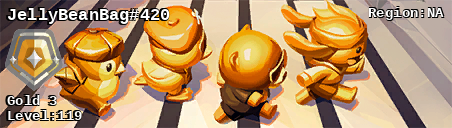

'0 new matches added to database.'


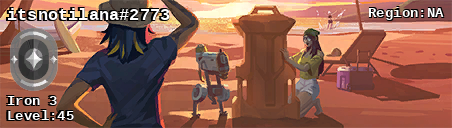

'0 new matches added to database.'


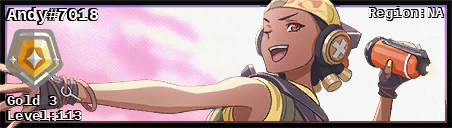

'0 new matches added to database.'


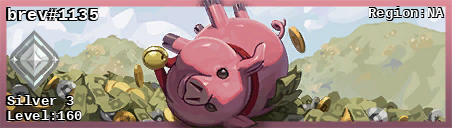

'0 new matches added to database.'


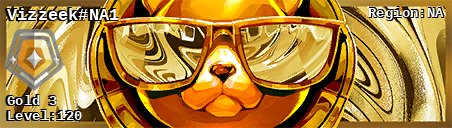

'6 new matches added to database.'


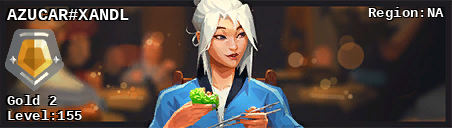

'1 new matches added to database.'


In [64]:
#start_time = time.time() # marks the beginning of execution time.

# Checks mongoDB to make sure account is not registered, and will run the code just for that account the first time.
if(check_unique_account(userName, userTag)):
  if(debug==True):
    pprint('New account detected')
  main(name=userName, tag=userTag, region=userRegion)

# Takes all registered accounts and fetches new matches for each of them.
allAccounts = collectionAccounts.find() #main
for account in allAccounts:
  if(debug==True):
    pprint(account.get('name') + '#' + account.get('tag') + ' ' + account.get('region') + ' ' + account.get('puuid'))
  main(name=account.get('name'), tag=account.get('tag'), region=account.get('region'))
  # if(debug==True):
  #   print('Cycle completed in', round((time.time() - start_time), 2), 'seconds.') # Shows how much time elapsed between loops.

#print('Code executed in', round((time.time() - start_time), 2), 'seconds.') # Shows execution time.